## Final Project Submission

Please fill out:
* Student name: Pacificah Asamba
* Student pace: self paced / part time / full time - part time
* Scheduled project review date/time:  
* Instructor name: Madam Mwikali
* Blog post URL:


# 1. Import the relevant libraries 

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load the Data into a DataFrame Called `Aviation_df`

The file path is `data/Aviation_Data.csv`. Use pandas to read in the data from this CSV file and create a dataframe named `Aviation_df`.

In [165]:
#load the Aviation data csv file using pandas to a dataframe called Aviation_df

Aviation_df = pd.read_csv('data/Aviation_Data.csv')
Aviation_df.head()   #run the .head() to view a sample of how our data looks like by printing the first five rows.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# 3. Data understanding

### Now that we have read our data to a dataframe, we are going to get to understand our data. This is done by using various methods as below:

* 1. First we need to know the shape of the data by using the .shape function
* 2. Next we will check the various datatypes we have, the number of rows and columns and which columns have non-null values using the .info() method
* 3. Use the .columns method to know the names of the columns

In [166]:
# To know the number of rows and columns, do a .shape
Aviation_df.shape

(90348, 31)

* From the above method we see that the dataset has 90,348 rows and 31 columns

In [167]:
#check the names of the columns
Aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [168]:
# Check the column names, data types and count of non-null values
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## info() method output analysis
1. The data is of class - pandas.core.frame.DataFrame since we read it from a csv file to a dataframe 
2. There are 90,348 entries(rows) from index 0 to 90,347
3. There are 31 columns
4. All columns except Investigation.Type have missing values
5. Twenty six columns have data of type 'object' and five columns have type float64

In [169]:
# check count of missing values in each column
Aviation_df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

# 4. Data cleaning
Now that we have loaded our data and understood it by applying some dataframe methods, we need to do some data cleaning. In this section I will be focussing on:
#
i. Those columns which have missing values

ii. Columns with invalid values

iii. Check for duplicates 



In [170]:
# Define column names for better readability
EVENT_ID  ='Event.Id'
INVESTIGATION_TYPE='Investigation.Type'
ACCIDENT_NUMBER='Accident.Number'
EVENT_DATE='Event.Date'
LOCATION='Location'
COUNTRY='Country'
LATITUDE='Latitude'
LONGITUDE='Longitude'
AIRPORT_CODE='Airport.Code'
AIRPORT_NAME='Airport.Name'
INJURY_SEVERITY='Injury.Severity'
AIRCRAFT_DAMAGE='Aircraft.damage'
AIRCRAFT_CATEGORY='Aircraft.Category'
REGISTRATION_NUMBER='Registration.Number'
MAKE='Make'
MODEL='Model'
AMATEUR_BUILT='Amateur.Built'
NUMBER_OF_ENGINES='Number.of.Engines'
ENGINE_TYPE='Engine.Type'
FAR_DESCRIPTION='FAR.Description'
SCHEDULE='Schedule'
PURPOSE_OF_FLIGHT='Purpose.of.flight'
AIR_CARRIER='Air.carrier'
TOTAL_FATAL_INJURIES='Total.Fatal.Injuries'
TOTAL_SERIOUS_INJURIES='Total.Serious.Injuries'
TOTAL_MINOR_INJURIES='Total.Minor.Injuries'
TOTAL_UNINJURED='Total.Uninjured'
WEATHER_CONDITION='Weather.Condition'
BROAD_PHASE_OF_FLIGHT='Broad.phase.of.flight'
REPORT_STATUS='Report.Status'
PUBLICATION_DATE='Publication.Date'
YEAR='Year'

# Drop Columns

In the code cell below first I am going to drop the columns that have more than 25% of their data missing. These include Latitude, Longitude, Airport Code among others.

Secondly I am going to drop those columns which I feel are not important for my analysis. I drop these columns for easier handling of data and clearer analysis.


In [171]:
# Columns  that have roughly more than 25% of their data missing
columns_to_drop = [LATITUDE, LONGITUDE,AIRPORT_CODE, AIRPORT_NAME, AIRCRAFT_CATEGORY,FAR_DESCRIPTION,
                   SCHEDULE, AIR_CARRIER]
Aviation_df_clean = Aviation_df.drop(columns=columns_to_drop)

#I think there are many columns which are not important for my analysis. 

more_columns_to_drop = [ACCIDENT_NUMBER, REGISTRATION_NUMBER, AMATEUR_BUILT, 
                   PUBLICATION_DATE,  REPORT_STATUS,ENGINE_TYPE]

Aviation_df_clean = Aviation_df_clean.drop(columns=more_columns_to_drop)

print(Aviation_df_clean.columns) # printing to know the number of columns remaining
print(Aviation_df_clean.shape) #printing the shape of the new dataframe

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')
(90348, 17)


In [172]:
# Data cleaning and preparation 

# Convert 'Event.Date' to datetime format and extract year e.g 1948-10-24
Aviation_df_clean[EVENT_DATE] = pd.to_datetime(Aviation_df_clean[EVENT_DATE], format='%Y-%m-%d')
# Extract year from the date
Aviation_df_clean[YEAR] = Aviation_df_clean[EVENT_DATE].dt.year

# Filter for relevant years (last 20 years)
Aviation_df_clean = Aviation_df_clean[Aviation_df_clean[YEAR] >= 2000]

# print column names to check if they are correct
print(Aviation_df_clean.columns)

# Drop rows where 'Make' or 'Model' is missing (critical columns for analysis)
Aviation_df_clean = Aviation_df_clean.dropna(subset=[MAKE, MODEL])


# Fill missing numerical values (e.g., injuries) with 0
Aviation_df_clean[TOTAL_FATAL_INJURIES] = Aviation_df_clean[TOTAL_FATAL_INJURIES].fillna(0)
Aviation_df_clean[TOTAL_SERIOUS_INJURIES] = Aviation_df_clean[TOTAL_SERIOUS_INJURIES].fillna(0)
Aviation_df_clean[TOTAL_MINOR_INJURIES] = Aviation_df_clean[TOTAL_MINOR_INJURIES].fillna(0)
Aviation_df_clean[TOTAL_UNINJURED] = Aviation_df_clean[TOTAL_UNINJURED].fillna(0)

# filling missing values in Broad.Phase.of.flight column with unknown
Aviation_df_clean[BROAD_PHASE_OF_FLIGHT] = Aviation_df_clean[BROAD_PHASE_OF_FLIGHT].fillna("UNKNOWN")

#
Aviation_df_clean[MAKE] = Aviation_df_clean[MAKE].str.upper().str.strip()
Aviation_df_clean[MODEL] = Aviation_df_clean[MODEL].str.upper().str.strip()

print(Aviation_df_clean.shape)

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Year'],
      dtype='object')
(41134, 18)


In [173]:
# aggregations

# Group by aircraft model and count accidents
accidents_by_model = Aviation_df_clean.groupby(MODEL)
accidents_by_model =accidents_by_model.agg(
    # count accidents and assign to new column 'num_accidents'
    # b_min=pd.NamedAgg(column="B", aggfunc="min")
    num_accidents=(EVENT_ID, 'count'),
    total_fatalities=(TOTAL_FATAL_INJURIES, 'sum')
)
accidents_by_model = accidents_by_model.sort_values('num_accidents', ascending=True)

# Filter models with ≥10 accidents
filtered_models = accidents_by_model[accidents_by_model['num_accidents'] >= 0]

# Top 10 safest models (fewest accidents)
print(filtered_models.head(10))


               num_accidents  total_fatalities
Model                                         
(EX) RV-6                  1               2.0
LA4 - 200                  1               2.0
LA250                      1               0.0
LA-250                     1               0.0
LA 4 200                   1               0.0
LA 4                       1               0.0
LA 1                       1               0.0
L60                        1               0.0
L382G (C-130)              1               0.0
LA4-270T                   1               0.0


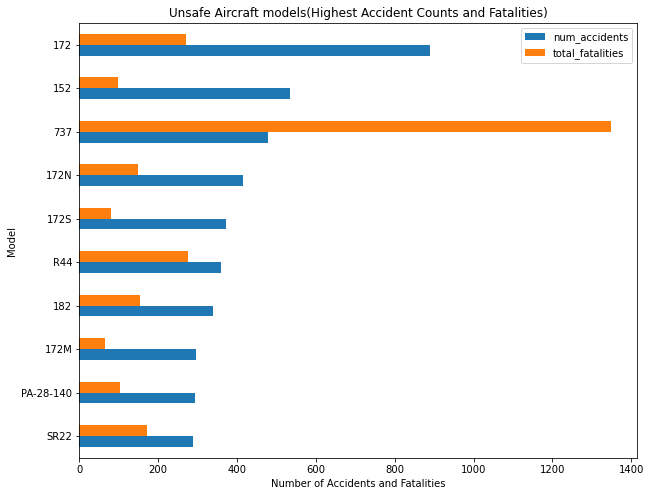

In [174]:
# Highest accident counts by model


filtered_models.tail(10).plot(kind='barh', legend=True, figsize = (10,8))
plt.title('Unsafe Aircraft models(Highest Accident Counts and Fatalities)')
plt.xlabel('Number of Accidents and Fatalities')
plt.show()

### Unsafe aircrafts Notes
The bar graph above is a plot of Aircraft models against the number of accidents and the fatalities associated to them. I used the 'filtered_models' dataframe which is a subset of the main dataframe which shows the aircraft model, number of accidents and fatalities only. As we can learn from the legend, the blue color shows the number of accidents whereas the orange color shows the fatalities.
* Analysis:   
Most of the models had a higher number of accidents compared to the resulting fatalities in each case except for the model 737 which had so many fatalities and barely small number of accidents.
I advice the head of aviation division to keep off from all these ten aircrafts as they may result in losses due to the high number of accidents and fatalities associated with them.

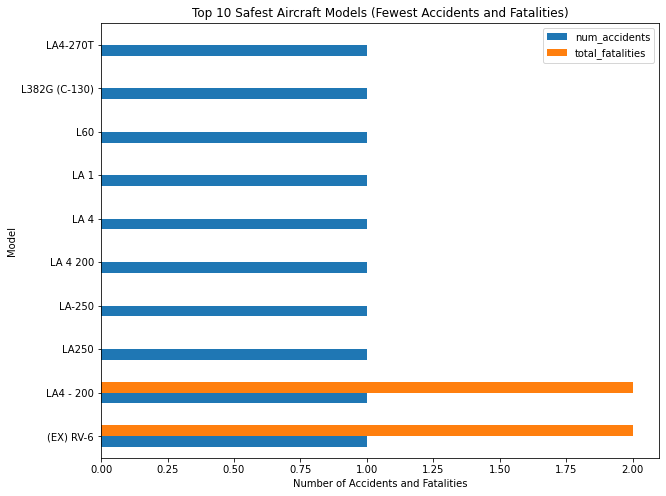

In [175]:
# Bar Chart (Safest Models)
# Plot top 10 safest models
filtered_models.head(10).plot(kind='barh', legend=True, figsize = (10,8))
plt.title('Top 10 Safest Aircraft Models (Fewest Accidents and Fatalities)')
plt.xlabel('Number of Accidents and Fatalities')
plt.show()

### Top Ten Safest Models
This is a plot of the filtered_models.head(10). These show those aircraft models with the lowest number of accidents and fatalities, hence considered to be safer. I used both the number of accidents and number of fatalities because to come up with a conclusion because there are instances where you can find a high number of accidents but fewer fatalities. 
In this case all the ten aircraft models had about one accident(blue bar), eight of them had no fatalities and the two models at the bottom had very high fatalities resulting from the same number of accidents as the others. Even if the number of accidents wasn't extremely high, when accidents happened with these models, they were often very deadly.

* Recommendation: I recommend the head of Aviation Division to consider acquisition from the eight models, that is, LA250, LA-250, LA 4 200, LA4, LA1, L60, L382G(C-130) and LA4-270T

Text(0.5, 1.0, 'Accidents by Flight Phase')

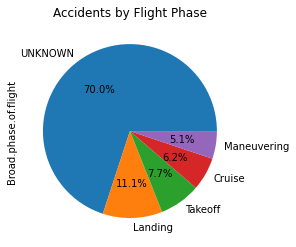

In [176]:
# Group by 'Broad.phase.of.flight' (e.g., takeoff, landing)
phase_counts = Aviation_df_clean[BROAD_PHASE_OF_FLIGHT].value_counts().head(5)
phase_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Accidents by Flight Phase')

### Accidents by Flight Phase analysis

As we can see from the above pie chart most accidents occur at an unknown phase. Then it is followed by: landing, take-off, Cruise, Maneuvering in that order. From this I advise that upon acquisition of the aircraft more training will be needed on landing and take-offs to minimize accidents. 

In [177]:
Aviation_df_clean[PURPOSE_OF_FLIGHT].value_counts()
Aviation_df_clean.groupby(PURPOSE_OF_FLIGHT)['Total.Fatal.Injuries'].sum()

Purpose.of.flight
ASHO                           14.0
Aerial Application            269.0
Aerial Observation            251.0
Air Drop                       10.0
Air Race show                  42.0
Air Race/show                  34.0
Banner Tow                     19.0
Business                      633.0
Executive/corporate           311.0
External Load                  39.0
Ferry                         229.0
Firefighting                   37.0
Flight Test                   127.0
Glider Tow                     16.0
Instructional                 992.0
Other Work Use                284.0
PUBL                            0.0
PUBS                            0.0
Personal                     8289.0
Positioning                   349.0
Public Aircraft               136.0
Public Aircraft - Federal      41.0
Public Aircraft - Local        13.0
Public Aircraft - State        23.0
Skydiving                      63.0
Unknown                      1606.0
Name: Total.Fatal.Injuries, dtype: float64

In [178]:
Aviation_df_clean['Injury.Severity'].value_counts()

Non-Fatal     30424
Fatal          5248
Fatal(1)       1644
Fatal(2)       1002
Incident        638
              ...  
Fatal(138)        1
Fatal(16)         1
Fatal(21)         1
Fatal(145)        1
Fatal(44)         1
Name: Injury.Severity, Length: 67, dtype: int64

In [179]:
Aviation_df_clean.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=True)

Make
KADE                    0.0
MCLAUGHLIN              0.0
MCMICHAEL ELMER L       0.0
MCMILLAN JOEL L         0.0
MCNABB                  0.0
                      ...  
AIRBUS               1325.0
BEECH                1699.0
PIPER                2695.0
CESSNA               4250.0
BOEING               5206.0
Name: Total.Fatal.Injuries, Length: 5243, dtype: float64

In [180]:
# aggregations

# Group by aircraft model and count accidents
accidents_by_make = Aviation_df_clean.groupby(MAKE)
accidents_by_make =accidents_by_make.agg(
       num_accidents=(EVENT_ID, 'count'),
    total_fatalities=(TOTAL_FATAL_INJURIES, 'sum')
)
accidents_by_make = accidents_by_make.sort_values('num_accidents', ascending=True)

# Filter models with ≥10 accidents
filtered_make = accidents_by_make[accidents_by_make['num_accidents'] >= 0]

# Top 10 safest models (fewest accidents)
print(filtered_make.head(10))

                          num_accidents  total_fatalities
Make                                                     
107.5 FLYING CORPORATION              1               1.0
MOONEY AIRCRAFT                       1               0.0
MOON                                  1               1.0
MOODY-SIPLE                           1               0.0
MOODY                                 1               0.0
MONTGOMERY                            1               0.0
MONTE CLARK                           1               0.0
MOONEY AIRCRAFT CORP                  1               0.0
MONTANA                               1               0.0
MONROE DENNIS                         1               2.0


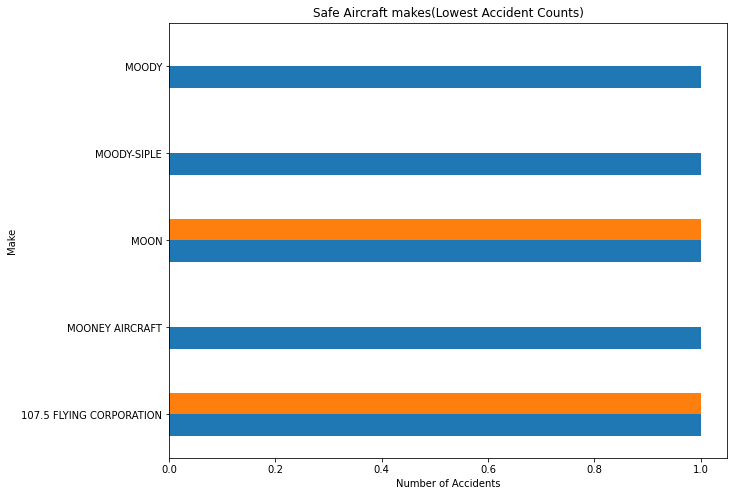

In [181]:
filtered_make.head(5).plot(kind='barh', legend=False, figsize = (10,8))
plt.title('Safe Aircraft makes(Lowest Accident Counts)')
plt.xlabel('Number of Accidents')
plt.show()